In [11]:
import numpy as np

class Pdf:
    def __call__(self, x):
        pass

    def sample(self, n):
        pass

# distribution to estimate
class Norm(Pdf):
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def __call__(self, x):
        return 1 / (self.sigma * (2 * 3.14159) ** 0.5) * 2.71828 ** (-(x - self.mu) ** 2 / (2 * self.sigma ** 2))

    def sample(self, n):
        return np.random.normal(self.mu, self.sigma, n)

# proposal distribution
class Unif(Pdf):
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return np.ones_like(x) * 1 / (self.b - self.a)

    def sample(self, n):
        return np.random.uniform(self.a, self.b, n)

class ImportanceSampler:
    def __init__(self, target, proposal):
        self.target = target
        self.proposal = proposal

    def sample(self, n):
        samples = self.proposal.sample(n)
        weights = self.target(samples) / self.proposal(samples)
        norm_weights = weights / np.sum(weights)
        return samples, norm_weights

In [12]:
M = 200000
target = Norm(0, 1)
proposal = Unif(-10, 10)
sampler = ImportanceSampler(target, proposal)
biased_samples, weights = sampler.sample(M)

In [13]:
N = 100000
samples = np.random.choice(biased_samples, N, p=weights)

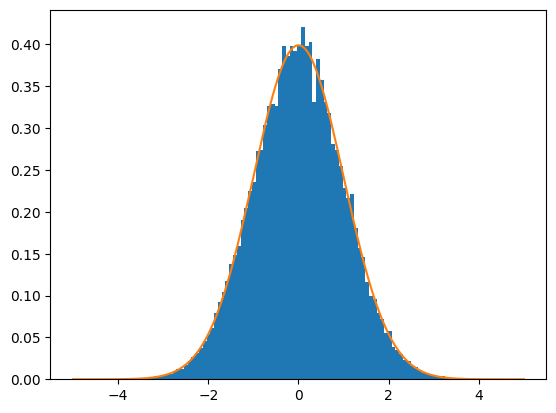

In [14]:
import matplotlib.pyplot as plt

# estimated distribution
_ = plt.hist(samples, bins=100, density=True)
# target distribution
x = np.linspace(-5, 5, 1000)
plt.plot(x, target(x))

In [149]:
import scipy.integrate as si

def func(x):
    return x ** 2

a = -1
b = 1

print(si.quad(func, a, b)[0])

N = 10000
samples = np.random.uniform(a, b, N)
weights = np.ones_like(samples) * 1 / (b - a)
print(1 / N * np.sum(func(samples) / weights))
pdf = lambda x: 3 / 2 * x ** 2
print(1 / N * np.sum(func(samples) / weights))

0.6666666666666666
0.6646526655595224
0.6646526655595224


In [150]:
M = 10000

class Dist(Pdf):
    def __init__(self):
        self.func = func

    def __call__(self, x):
        return 3 / 2 * x ** 2

    def sample(self, n):
        assert False

class ImportanceSampler:
    def __init__(self, target, proposal):
        self.target = target
        self.proposal = proposal

    def sample(self, n):
        samples = self.proposal.sample(n)
        weights = self.target(samples) / self.proposal(samples)
        norm_weights = weights / np.sum(weights)
        return samples, norm_weights

target = Dist()
proposal = Unif(-1, 1)

sampler = ImportanceSampler(target, proposal)

TIMES = 10
preds_0 = []
preds_00 = []
preds_1 = []
for _ in range(TIMES):
    biased_samples, weights = sampler.sample(M)
    samples = np.random.choice(biased_samples, N, p=weights)
    pred_0 = 1 / N * np.sum(func(samples) / target(samples) * 1 / M * np.sum((proposal(samples) / target(samples))))
    preds_0.append(pred_0)
    pred_00 = func(samples[0]) / target(samples[0]) * 1 / M * np.sum((proposal(samples) / target(samples)))
    preds_00.append(pred_00)

    samples = np.random.uniform(a, b, N)
    weights = np.ones_like(samples) * 1 / (b - a)
    pred_1 = 1 / N * np.sum(func(samples) / weights)
    preds_1.append(pred_1)

    print(pred_0, pred_00, pred_1)

print(np.var(preds_0), np.var(preds_00), np.var(preds_1))

0.7800998276303738 0.7800998276303737 0.6690730341816047
0.6424183861896715 0.6424183861896715 0.6617734681661914
0.6410674327813799 0.6410674327813797 0.6614648159501659
0.625538936339364 0.625538936339364 0.6845989812179094
0.6354273157804236 0.6354273157804234 0.647173827226935
0.658659817188438 0.6586598171884377 0.678263257723197
0.6592683595380311 0.6592683595380311 0.6664919759033001
0.6733033125031007 0.6733033125031005 0.6749949134511736
0.6948033154498586 0.6948033154498588 0.6651913543218058
0.6233032642074027 0.6233032642074027 0.6704358020891587
0.0019505283265861813 0.0019505283265861813 9.622154080256214e-05
